# MULTICLASS CLASSIFICATION 



In [555]:
#importing libraries
#__Nothing_to_change_here__

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [556]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_test,Y_test,test_size=0.2)

In [557]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(8000, 28, 28) (8000,) (2000, 28, 28) (2000,)


In [558]:
#print the unique values in Y_train
np.unique(Y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

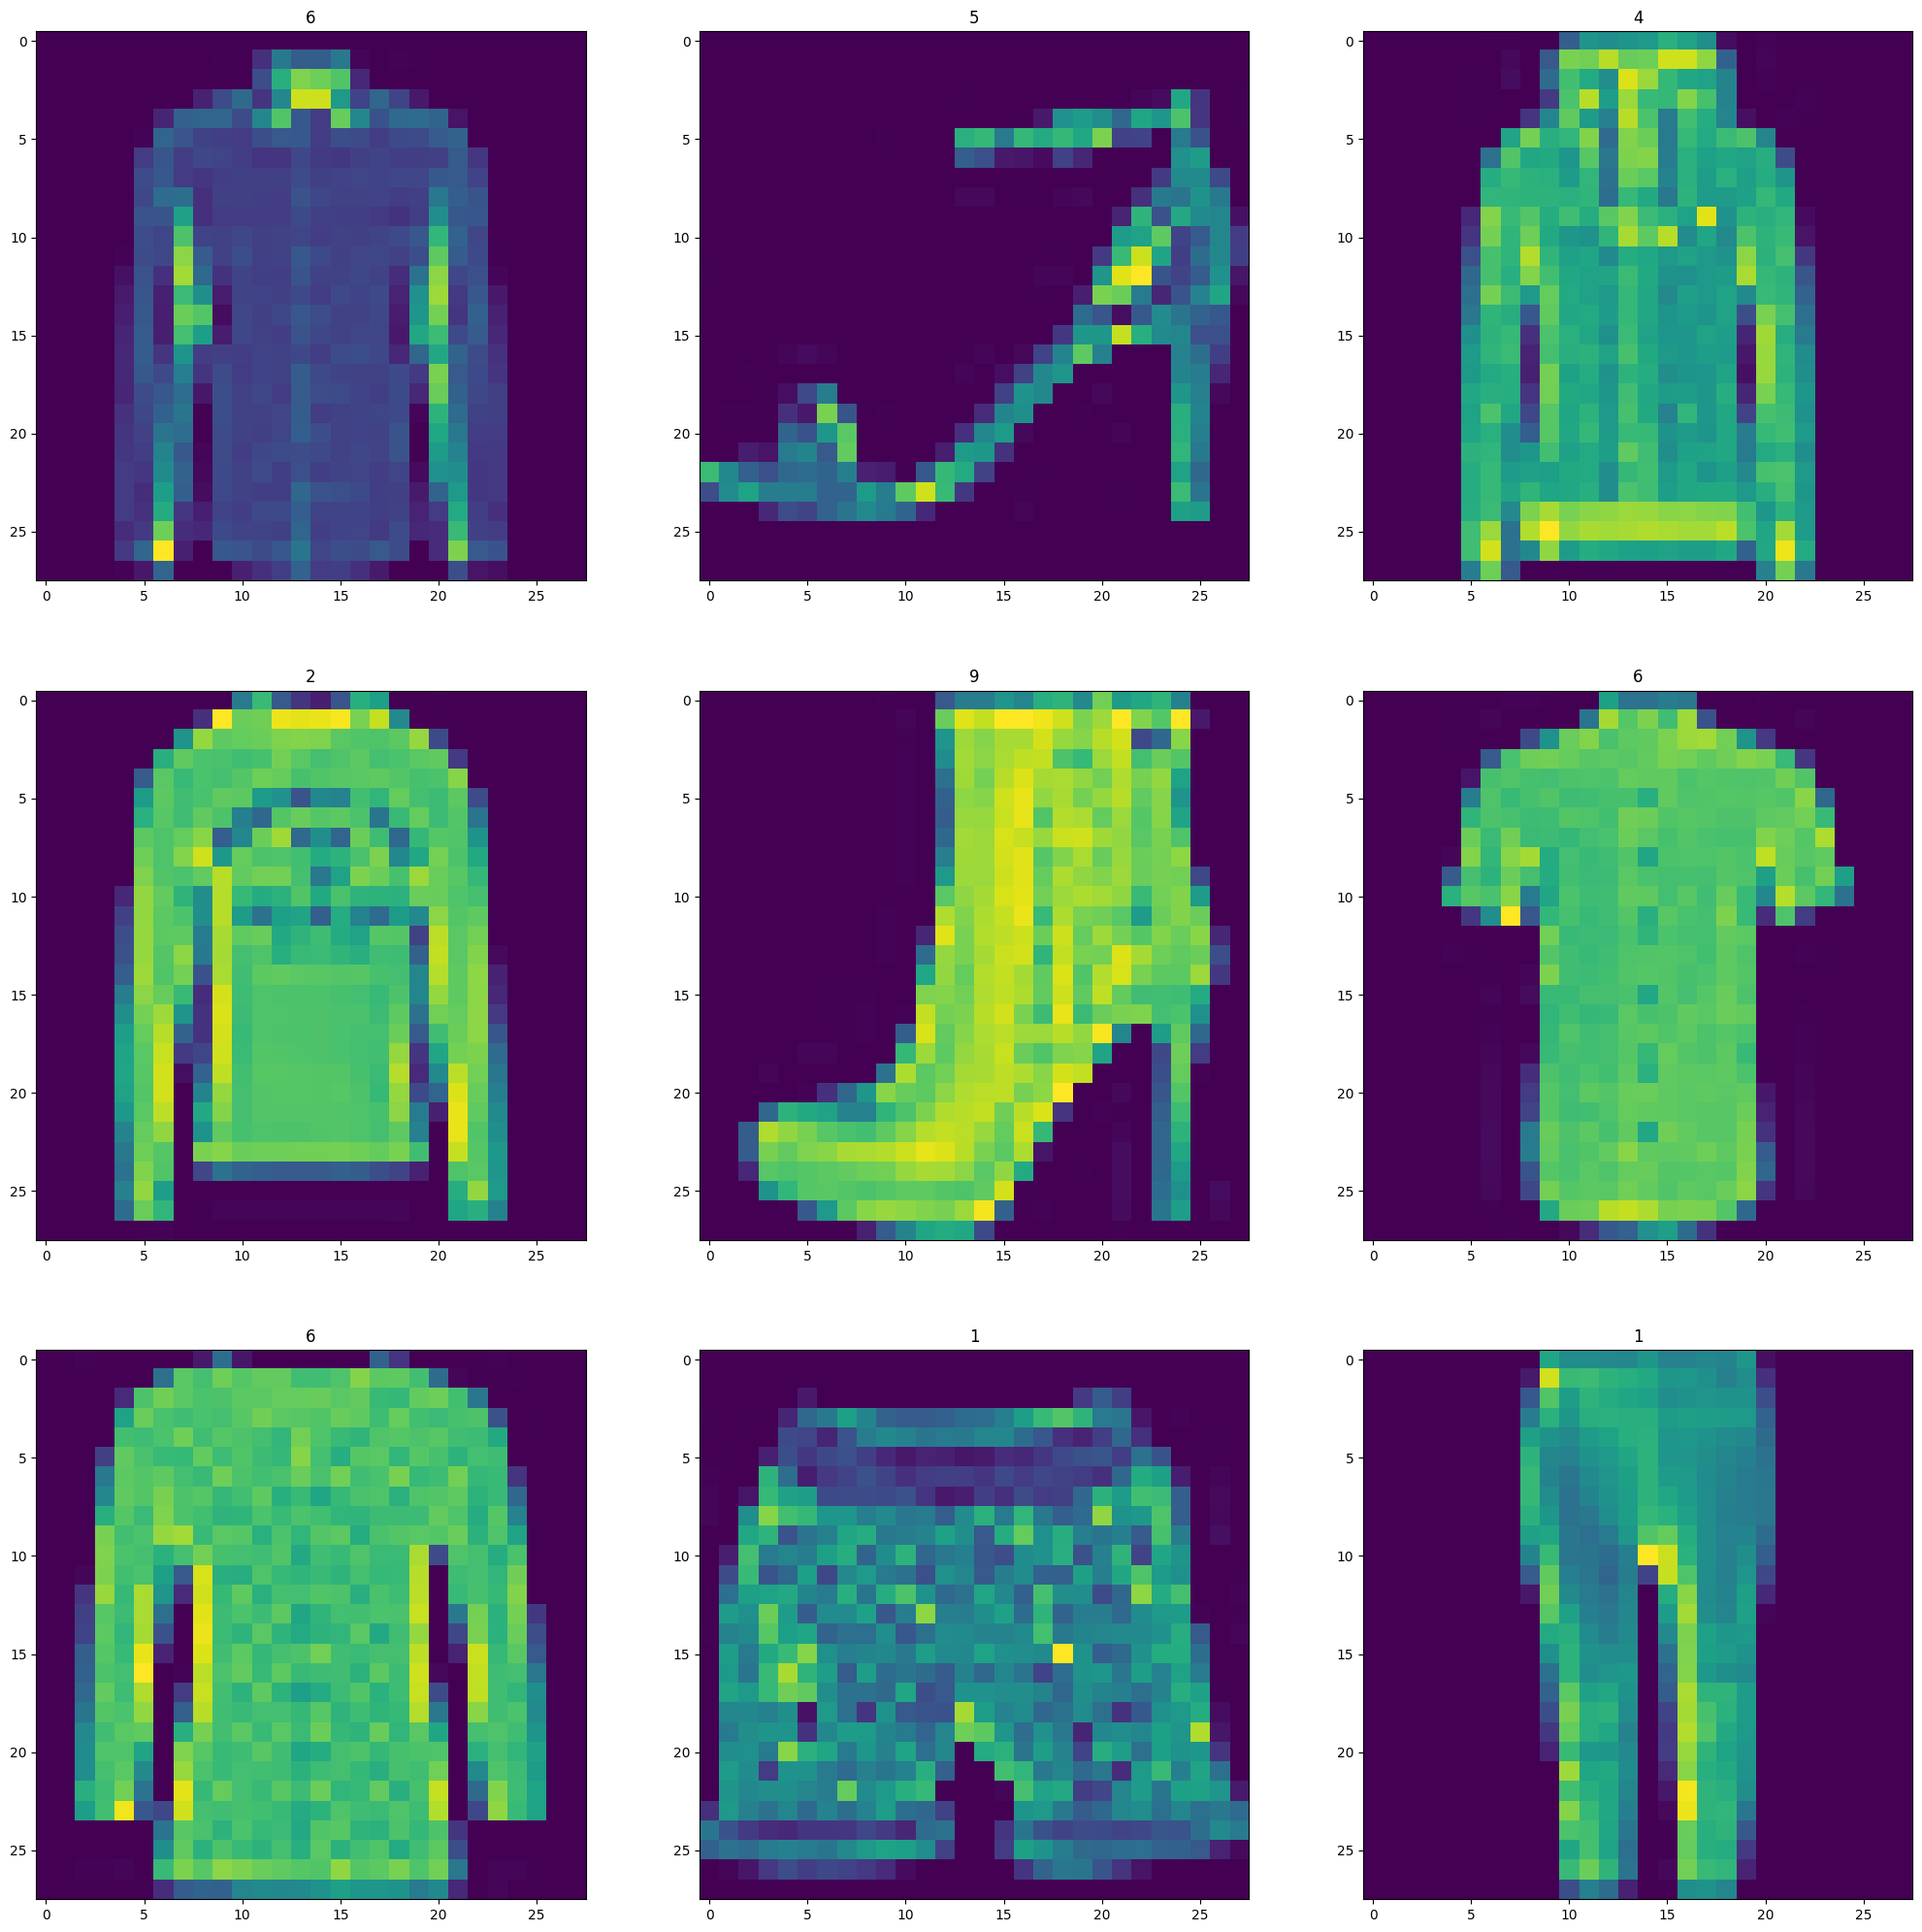

In [575]:
#randomly print 9 images with label
#edit the 2 lines of the code snippet

import random
figure = plt.figure(figsize=(25,25))
for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  #edit2__add_label_here_

  plt.title(Y_train[index])
  

  
  
  


###These number denotes the respective object
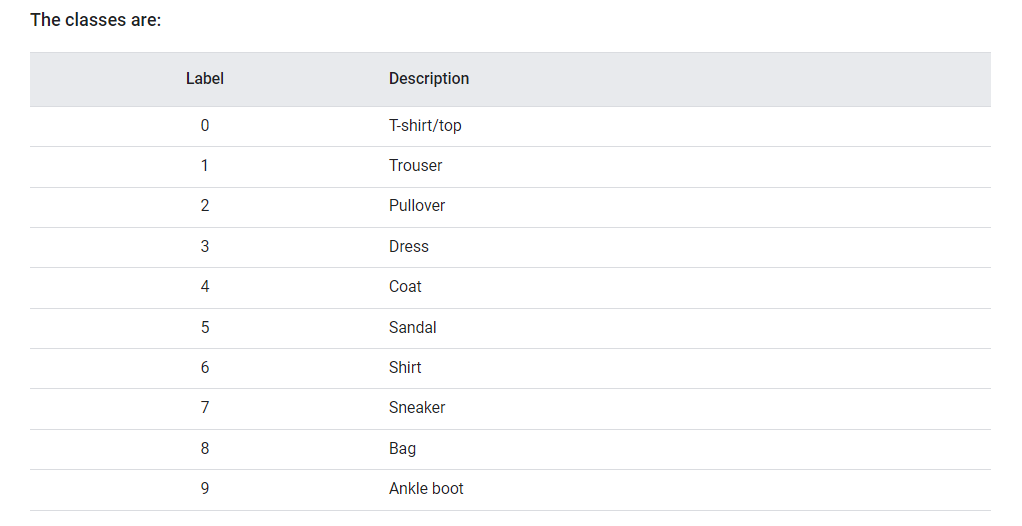

In [581]:
# Find the count of each type of class
counts  = np.unique(Y_train, return_counts = True)
print(counts)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([809, 816, 786, 807, 790, 805, 784, 792, 803, 808]))


In [561]:
# model initialization
model = tf.keras.Sequential()

# adding the 1st and 2nd layer layer 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))


#__add__ additional Intermediate Dense layers here to create the output
model.add(tf.keras.layers.Dense(64, activation = 'relu'))



#__output__layer with correct output shape and activation function[ google if finding this difficult to get]
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [562]:
# Compiling the model
#add the lr and loss in the given space

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
                  loss = 'sparse_categorical_crossentropy'# __add_loss_function__
                  ,metrics=['accuracy'])

In [563]:
#Lets analyse the model
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_26 (Flatten)        (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 128)               100480    
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dense_78 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


###What is the number of trainable parameters in the model?

In [564]:
""" 
109, 386
"""

' \n109, 386\n'

In [565]:
#lets train the model
#pass correct argument at the comment's place

history = model.fit(X_train, Y_train, validation_split=0.2, epochs = 50, batch_size = 32)

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 11.3719 - accuracy: 0.4991 - val_loss: 1.4465 - val_accuracy: 0.6269
Epoch 2/50
200/200 [==============================] - 1s 4ms/step - loss: 1.2515 - accuracy: 0.6419 - val_loss: 1.1853 - val_accuracy: 0.6737
Epoch 3/50
200/200 [==============================] - 1s 4ms/step - loss: 1.0913 - accuracy: 0.6783 - val_loss: 1.1155 - val_accuracy: 0.6869
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9618 - accuracy: 0.6900 - val_loss: 0.9452 - val_accuracy: 0.6744
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.8063 - accuracy: 0.7017 - val_loss: 0.8650 - val_accuracy: 0.6906
Epoch 6/50
200/200 [==============================] - 1s 4ms/step - loss: 0.7569 - accuracy: 0.7055 - val_loss: 0.9142 - val_accuracy: 0.6881
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.7304 - accuracy: 0.7127 - val_loss: 0.8100 - val_accuracy: 0.7081
Epoch

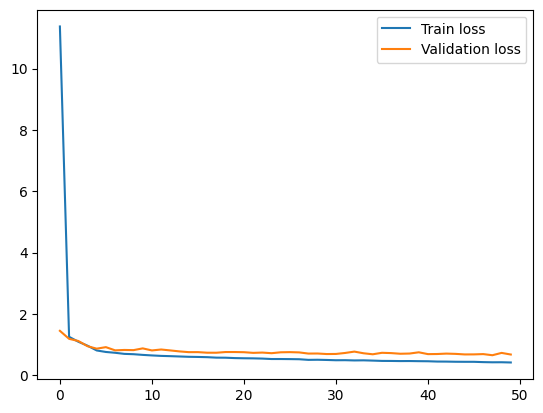

In [566]:
#lets plot the losses

plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

###What do you infer from the graph of losses above?

In [567]:
"""
[Under 100 words] Write your answer here: 
As our model starts learning by changing the weights it becomes better and bettter. So the loss for training data decreases significantly.
After that our model tries to predict values for completely new data set i.e. validation data. Since our model had done its learning, so 
loss is almost constant.

"""

'\n[Under 100 words] Write your answer here: \nAs our model starts learning by changing the weights it becomes better and bettter. So the loss for training data decreases significantly.\nAfter that our model tries to predict values for completely new data set i.e. validation data. Since our model had done its learning, so \nloss is almost constant.\n\n'

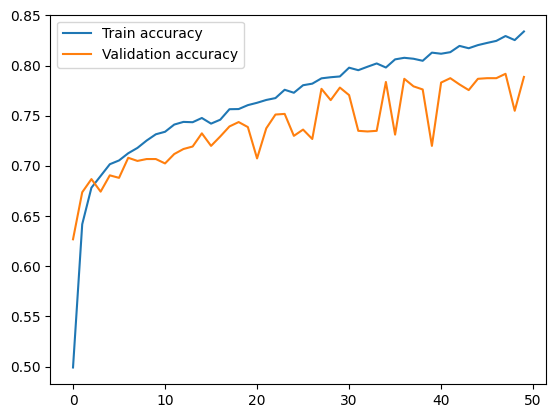

In [568]:
#plotting the accuracy of the traing

plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

###What do you infer from the graph of accuracies above?

In [569]:
"""
[Under 100 words] Write your answer here:
Accuracy for the training data is very less initially. But number of iteration statrts increasing the model learns to fit a better curve or we can 
say it modifies the weights so that accuracy increases. So the training accuracy increases with itereations.
After our model completes its learning then it takes completely new data sets from validation data set and try to predict the outcome, 
so the accuracy is about 70% with little ups and downs.
"""

'\n[Under 100 words] Write your answer here:\nAccuracy for the training data is very less initially. But number of iteration statrts increasing the model learns to fit a better curve or we can \nsay it modifies the weights so that accuracy increases. So the training accuracy increases with itereations.\nAfter our model completes its learning then it takes completely new data sets from validation data set and try to predict the outcome, \nso the accuracy is about 70% with little ups and downs.\n'

In [570]:
#Checking the prediction

Y_predicted = model.predict(X_test)



63/63 [==============================] - 0s 3ms/step


In [571]:
# Calculate the R2score for the test data
from sklearn.metrics import r2_score
print(r2_score(Y_test, np.argmax(Y_predicted, axis=1)))


0.674379688954245


In [572]:
# Let's see the kernel(weights) of the layers
model.layers[1].kernel.shape

TensorShape([784, 128])

In [573]:
# print the shape of kernel of other layers as well
print(model.layers[2].kernel.shape,model.layers[3].kernel.shape)


(128, 64) (64, 10)


In [574]:
# Does that satisfied the matrix multiplication math discussed earlier
